In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv.zip')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
df['zip'].nunique()

204

In [7]:
df['zip'].count()

583323

In [8]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [10]:
df['title'].nunique()

148

In [11]:
len(df['title'].unique())

148

In [12]:
x = df['title'].iloc[0]

In [13]:
x

'EMS: BACK PAINS/INJURY'

In [14]:
x.split(':')[0]

'EMS'

In [15]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [16]:
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: reason, Length: 663522, dtype: object

In [17]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

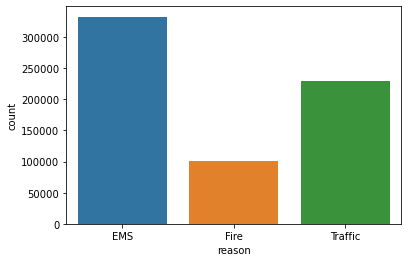

In [18]:
sns.countplot(x='reason',data = df)

<AxesSubplot:xlabel='reason', ylabel='count'>

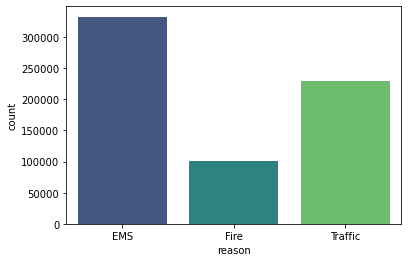

In [19]:
sns.countplot(x='reason',data = df, palette='viridis')

In [20]:
df['timeStamp'].iloc()

In [21]:
df['timeStamp'].iloc()[0]

'2015-12-10 17:10:52'

In [22]:
type(df['timeStamp'].iloc()[0])

str

In [23]:
pd.to_datetime(df['timeStamp'])

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

In [24]:
df['timeStamp'] =  pd.to_datetime(df['timeStamp'])

In [25]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

In [26]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
time = df['timeStamp'].iloc[0]

In [28]:
time.hour

17

In [29]:
time.year

2015

In [30]:
time.month

12

In [31]:
time.dayofweek

3

In [32]:
df['hour'] = df['timeStamp'].apply(lambda time:time.hour)

In [33]:
df['hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: hour, Length: 663522, dtype: int64

In [34]:
df['hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['month'] = df['timeStamp'].apply(lambda time:time.month)
df['day of week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [35]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [36]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [37]:
df['day of week'] = df['day of week'].map(dmap)

In [38]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur


<AxesSubplot:xlabel='day of week', ylabel='count'>

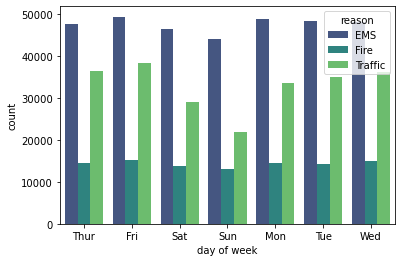

In [39]:
sns.countplot(x='day of week',data = df,hue='reason',palette='viridis')

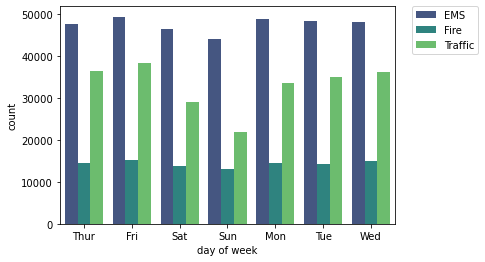

In [40]:
sns.countplot(x='day of week',data = df,hue='reason',palette='viridis')
#to relocate the legend outside the graph area
plt.legend(bbox_to_anchor=(1.05,1), loc= 2, borderaxespad=0)

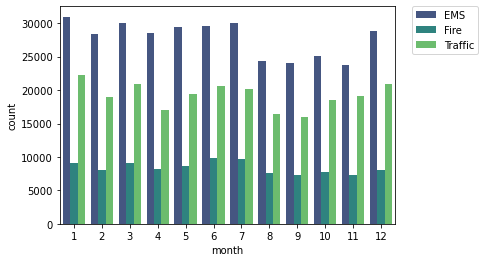

In [41]:
sns.countplot(x='month',data = df,hue='reason',palette='viridis')
#to relocate the legend outside the graph area
plt.legend(bbox_to_anchor=(1.05,1), loc= 2, borderaxespad=0)

In [42]:
### In case some months are not displayed on the graph;
### We can group by the month and plot a line-plot by any column

In [43]:
byMonth = df.groupby('month').count()

In [44]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


<AxesSubplot:xlabel='month', ylabel='lat'>

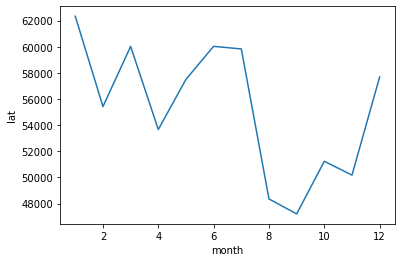

In [45]:
sns.lineplot(y='lat',x= 'month' , data = byMonth)

<AxesSubplot:xlabel='month'>

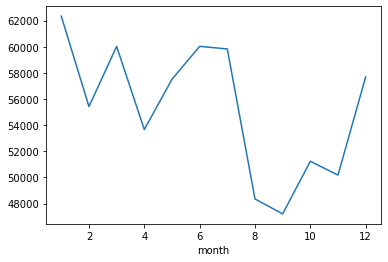

In [46]:
byMonth['lat'].plot()

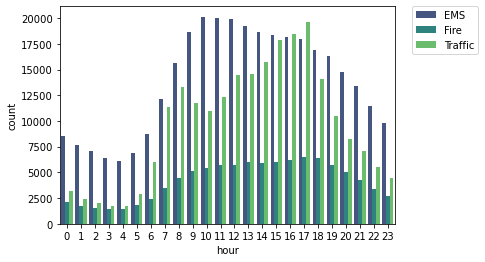

In [47]:
sns.countplot(x='hour',data = df,hue='reason',palette='viridis')
#to relocate the legend outside the graph area
plt.legend(bbox_to_anchor=(1.05,1), loc= 2, borderaxespad=0)

In [48]:
### Lets use seaborn lmplot() to create a linear fit on the 
###number of calls per month

### You may need to reset the index (month) to become a column.

In [49]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


In [50]:
byMonth.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


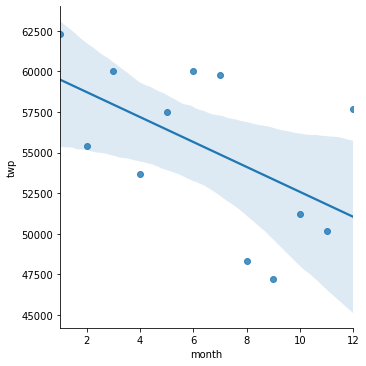

In [54]:
sns.lmplot(x= 'month',y= 'twp', data= byMonth.reset_index())

In [55]:

### Lets creat a date column from timestamp column.

In [56]:
df['timeStamp'].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

In [57]:
t = df['timeStamp'].iloc[0]

In [58]:
t

Timestamp('2015-12-10 17:10:52')

In [59]:
t.date()

datetime.date(2015, 12, 10)

In [60]:
df['date'] = df['timeStamp'].apply(lambda t: t.date())

In [61]:
### Let groupby the date column with count aggregate and 
###create a plot of counts of 911 calls

In [62]:
byDate = df.groupby('date').count()

In [63]:
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


In [64]:
df['date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: date, Length: 663522, dtype: object

In [65]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur,2015-12-10


<AxesSubplot:xlabel='date'>

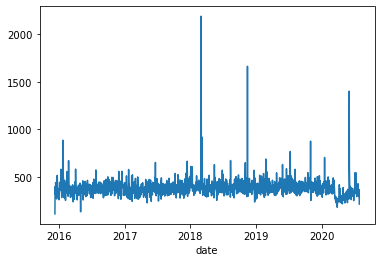

In [66]:
df.groupby('date').count()['lat'].plot()

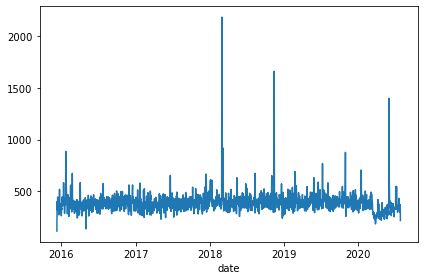

In [67]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

In [68]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur,2015-12-10


In [69]:
time = df['timeStamp'].iloc[0]

In [70]:
time

Timestamp('2015-12-10 17:10:52')

In [71]:
df['year'] = df['timeStamp'].apply(lambda time:time.year)

In [72]:
df['year']

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
663517    2020
663518    2020
663519    2020
663520    2020
663521    2020
Name: year, Length: 663522, dtype: int64

In [73]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date,year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur,2015-12-10,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur,2015-12-10,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur,2015-12-10,2015


In [74]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [75]:
df[df['year'] == 2016]['year'].count()

142360

In [76]:
df['year'].iloc[1] == 2015

True

In [77]:
df['year'].value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
2020     72258
2015      7916
Name: year, dtype: int64

In [78]:
df2016 = df[df['year'] == 2016]

In [79]:
df2016.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date,year
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,Fri,2016-01-01,2016
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,Fri,2016-01-01,2016
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,0,1,Fri,2016-01-01,2016


In [80]:
# df['year'] = df['timeStamp'].apply(lambda time:time.day)

In [81]:
df[df['year']==2016].head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date,year
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,Fri,2016-01-01,2016
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,Fri,2016-01-01,2016


In [82]:
new = df[df['year'] == 2016]

In [83]:
new.set_index('date').head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,year
date,,,,,,,,,,,,,,
2016-01-01,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,Fri,2016
2016-01-01,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,Fri,2016


In [84]:
bydate = new.groupby('date').count()

In [85]:
bydate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,year
date,,,,,,,,,,,,,,
2016-01-01,262,262,262,236,262,262,262,262,262,262,262,262,262,262
2016-01-02,334,334,334,300,334,334,333,334,334,334,334,334,334,334
2016-01-03,322,322,322,284,322,322,322,322,322,322,322,322,322,322
2016-01-04,401,401,401,345,401,401,401,401,401,401,401,401,401,401
2016-01-05,445,445,445,373,445,445,445,445,445,445,445,445,445,445


In [86]:
# sns.lineplot(x='date',data=new.reset_index())

<AxesSubplot:xlabel='date'>

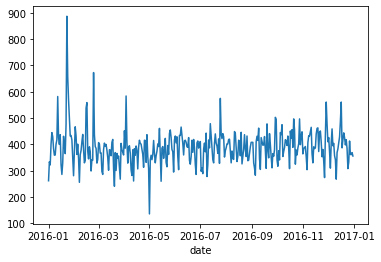

In [87]:
bydate['lat'].plot()

In [88]:
#rerun later      sns.lineplot(x='lat',data=new)

In [89]:
df[df['reason'] == 'EMS'].count()

lat            332692
lng            332692
desc           332692
zip            304855
title          332692
timeStamp      332692
twp            332480
addr           332692
e              332692
reason         332692
hour           332692
month          332692
day of week    332692
date           332692
year           332692
dtype: int64

In [90]:
EMS = df[df['reason'] == 'EMS']

In [91]:
EMS.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date,year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur,2015-12-10,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur,2015-12-10,2015
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,15,12,Thur,2015-12-10,2015


Text(0.5, 1.0, 'EMS')

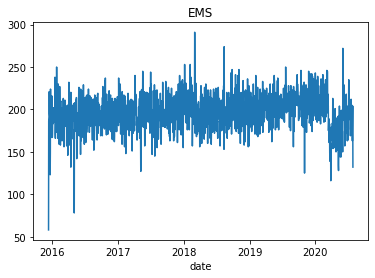

In [92]:
EMS.groupby('date').count()['lat'].plot()
plt.title('EMS')

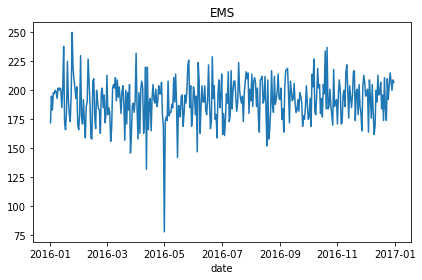

In [93]:
df2016[df2016['reason'] == 'EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

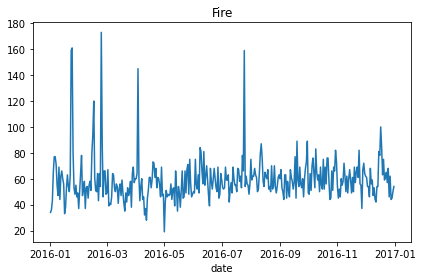

In [94]:
df2016[df2016['reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

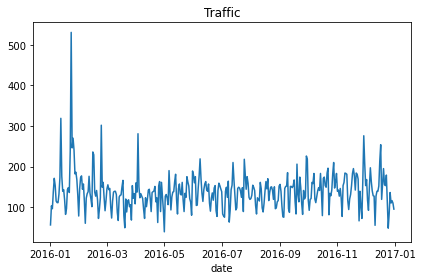

In [95]:
df2016[df2016['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

In [96]:
### Let create a heatmap with seaborn for this 911 data.

### We will need to first restructure the data to a matrix form
###so that each value can have row & col representation.

In [97]:
### Multi-level grouping

In [98]:
df2016.groupby(by=['day of week','hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
day of week hour                                                          
Fri         0     385  385   385  350    385        385  385   385  385   
            1     345  345   345  299    345        345  344   345  345   
            2     307  307   307  273    307        307  307   307  307   
            3     286  286   286  253    286        286  286   286  286   
            4     268  268   268  247    268        268  268   268  268   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    994  994   994  870    994        994  994   994  994   
            20    909  909   909  802    909        909  909   909  909   
            21    750  750   750  672    750        750  749   750  750   
            22    610  610   610  542    610        610  610   610  610   
            23    478  478   478  417    478        478  477   478  478   

                  reason  month  date  year  
day of week hour                             
Fri         0        385    385   385   385  
            1        345    345   345   345  
            2        307    307   307   307  
            3        286    286   286   286  
            4        268    268   268   268  
...                  ...    ...   ...   ...  
Wed         19       994    994   994   994  
            20       909    909   909   909  
            21       750    750   750   750  
            22       610    610   610   610  
            23       478    478   478   478  

[168 rows x 13 columns]

In [99]:
df2016.groupby(by=['day of week','hour']).count()['reason']

day of week  hour
Fri          0       385
             1       345
             2       307
             3       286
             4       268
                    ... 
Wed          19      994
             20      909
             21      750
             22      610
             23      478
Name: reason, Length: 168, dtype: int64

## Unstack

In [100]:
dayhour2016 = df2016.groupby(by=['day of week','hour']).count()['reason'].unstack()

In [101]:
dayhour2016

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,385,345,307,286,268,324,608,950,1075,1159,...,1323,1455,1514,1482,1146,1073,953,859,783,652
Mon,382,291,284,253,298,349,566,952,1212,1163,...,1216,1328,1373,1390,1201,1019,859,659,607,438
Sat,542,453,383,367,344,353,391,547,716,974,...,1154,1154,1147,1154,1060,1044,896,794,711,681
Sun,512,451,411,383,315,341,380,542,661,872,...,990,978,961,1013,990,937,737,662,536,488
Thur,397,284,308,234,256,333,563,973,1161,1237,...,1244,1380,1330,1487,1169,1016,857,764,606,485
Tue,377,314,275,237,274,351,583,980,1223,1217,...,1316,1337,1472,1472,1270,969,881,749,567,419
Wed,372,307,247,280,233,341,599,1031,1186,1147,...,1305,1349,1432,1453,1235,994,909,750,610,478


<AxesSubplot:xlabel='hour', ylabel='day of week'>

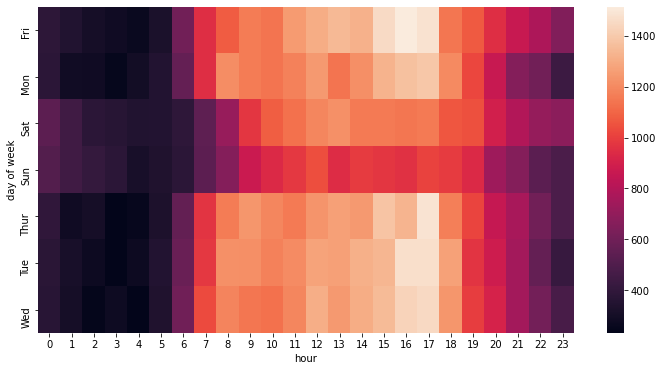

In [128]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour2016)

<AxesSubplot:xlabel='hour', ylabel='day of week'>

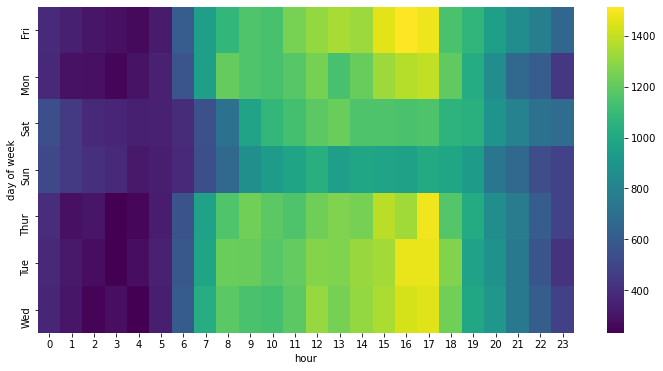

In [127]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour2016,cmap='viridis')


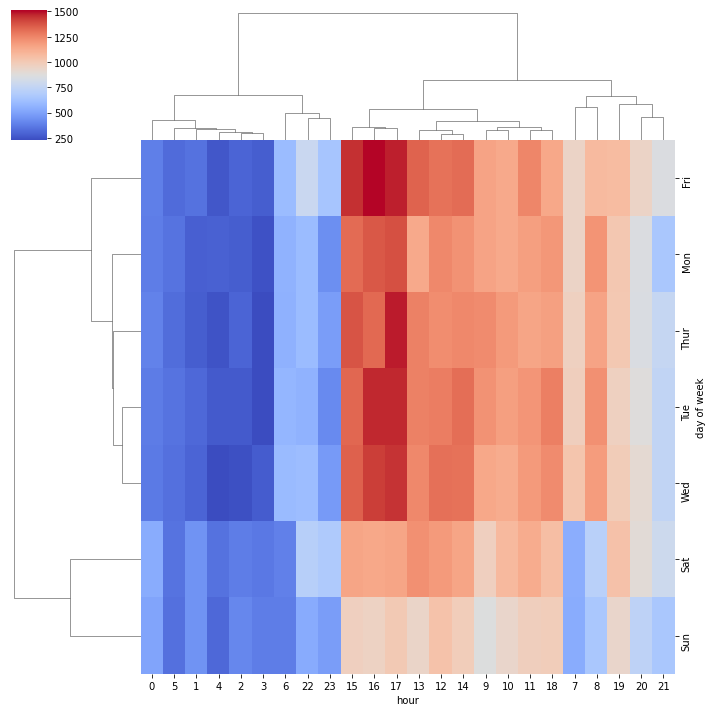

In [104]:
sns.clustermap(dayhour2016,cmap='coolwarm')

In [105]:
monthday2016 = df2016.groupby(by=(['day of week','month'])).count()['reason'].unstack()

In [106]:
monthday2016

month,1,2,3,4,5,6,7,8,9,10,11,12
day of week,,,,,,,,,,,,
Fri,1950,1564,1521,1949,1725,1647,2042,1740,2195,1901,1699,2058
Mon,1718,1959,1534,1594,1776,1609,1685,1865,1552,2042,1682,1526
Sat,2253,1435,1264,1736,1438,1376,1691,1423,1406,1935,1516,2015
Sun,1947,1223,1097,1486,1413,1329,1667,1360,1235,1757,1281,1273
Thur,1584,1582,1883,1592,1585,2055,1642,1579,2165,1625,1630,2002
Tue,1961,1743,1871,1421,1904,1671,1650,1993,1559,1542,2193,1699
Wed,1683,1890,1889,1509,1533,2045,1711,1944,1557,1700,2090,1589


<AxesSubplot:xlabel='month', ylabel='day of week'>

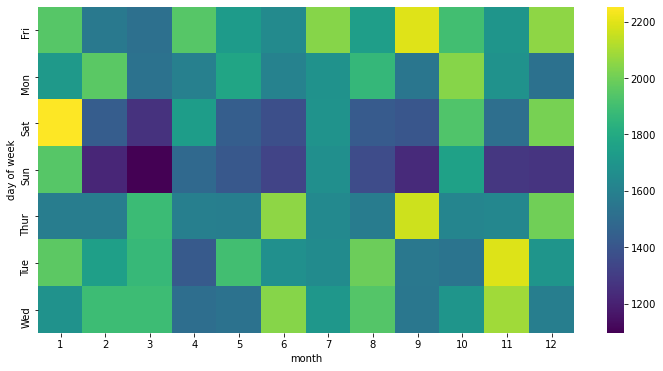

In [129]:
plt.figure(figsize=(12,6))
sns.heatmap(monthday2016,cmap='viridis')

<Figure size 864x432 with 0 Axes>

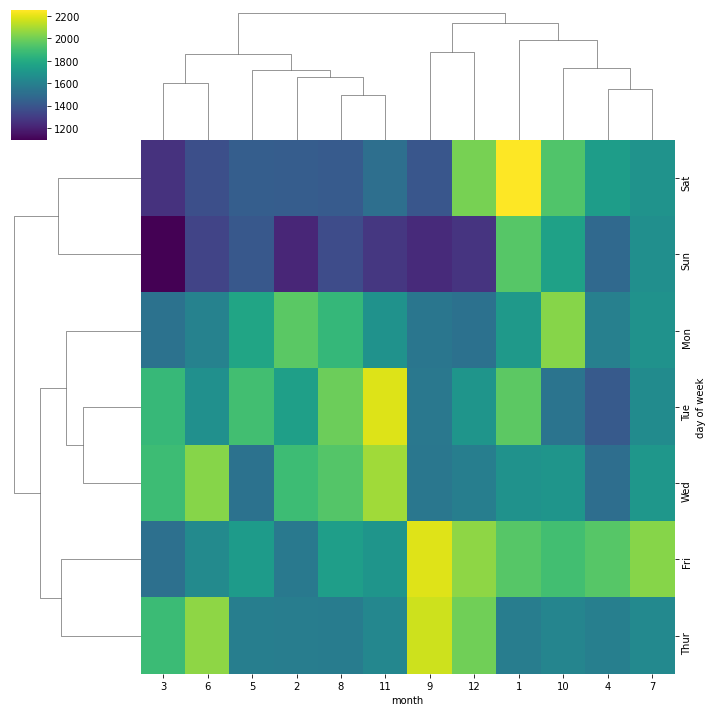

<Figure size 864x432 with 0 Axes>

In [108]:
sns.clustermap(monthday2016,cmap='viridis')
plt.figure(figsize=(12,6))